# 2020.05.17 머신러닝 알고리즘 스터디
# Naive Bayes Algorithm

## Connect to Google Drive

In [42]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys
sys.path.append("/content/gdrive/My Drive/Colab Notebooks")

Mounted at /content/gdrive


## 1. 개요

- 베이즈 정리에 기반한 통계적 분류 기법

### 1-1. 베이즈 정리 ( Bayes' theorem )

- 조건부 확률 : 사건 B 가 발생한 경우 A 의 확률

![alt text](https://drive.google.com/uc?id=1KD7PguJk1WNA8ndoY-sZ6xmvVCQGC1h7)

- Baye's theorem <br><br>
![alt text](https://drive.google.com/uc?id=1Q8ISO6AhwQwGvewafaSkORgPWB2oDllZ)

예제를 통해 살펴보자.

![alt text](https://drive.google.com/uc?id=1_97svhBYDqX9hmrx5yFGTsAkW5ZReRqs)

- P ( 비 ) = 7 / 20
- P ( ~ 비 ) = 13 /20

![alt text](https://drive.google.com/uc?id=1fFqkgHH1s9KmH6O9QOKMdDSK88kiV3WO)

- P ( 비 | 맑은날 ) = P ( 맑은날 | 비 ) * P ( 비 ) / P ( 맑은 날 )
- = 2 / 7 * 0.35 / 0.5 = 0.2

## 2. 동작

- Naive : "순진하다" 라는 뜻을 가지고 있다.
- 데이터셋의 모든 feature 들이 동등하고 독립적이라고 가정.
- 예를 들어, 비 오는 날에는 시간보다 습도가 중요한 변수가 될 수 있지만, 이러한 사실을 무시하고 동등, 독립을 가정한다.
- 분류학습에서 매우 정확한 결과값을 내놓는다.

![alt text](https://drive.google.com/uc?id=1xy93E1CPgm43gYRAR5Zw-8d1IrlImSib)

- 문제: 오늘 날씨가 좋고, 바람이 불지 않고, 기압은 높은데, 온도가 낮다면 오늘 비가 올 것인가? 안 올것인가? <br><br>
- 날씨 good.
- 바람 많이 불지 않음.
- 기압 높음.
- 온도 낮음.
- 이 때 비가 올 것인가? 안 올 것인가?

![alt text](https://drive.google.com/uc?id=1dmexBash9Ck85MRG1bx2TkRxF3S7S7ix) <br><br>

![alt text](https://drive.google.com/uc?id=1lvjkFSItZDjwtOr11Z7RoKVFJaozlCyn) <br><br>

![alt text](https://drive.google.com/uc?id=1xxSsAaijCRGKHX-9DFCxsiTbdwNkKctr) <br><br>

![alt text](https://drive.google.com/uc?id=1Y1c71biP6_WbYJf7w_Jd3lreQC6obkcu) <br><br>

![alt text](https://drive.google.com/uc?id=1H-SHq3Znc-TxtdQuk6zu5B3yWP5wCjVS) <br><br>



- 날씨 good.
- 바람 많이 불지 않음.
- 기압 높음.
- 온도 낮음. <br><br>

- 위의 경우일 때, 비가 올 확률은 2.7 %
- 비가 오지 않을 확률은 97.3 %

### Scikit-learn 을 활용한 Naive Bayes Classifier 구축

#### Label 이 1개인 경우

- 날씨와 온도에 따라 축구를 할 확률을 구하는 문제  <br><br>
- 2 features ( Weather , Temp )
- 1 label ( Play )

In [8]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

print(len(play))

14


- Change the label from 'str' type to 'int' type

In [10]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

# print out the converted value.
# Overcast: 0, Rainy: 1, Sunny: 2
print("Weather: ", weather_encoded)
# Cool: 0, Hot: 1, Mild: 2
print("Temp:",temp_encoded)
# No: 0, Yes: 1
print("Play:",label)


Weather:  [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


- Combining two features

In [12]:
#Combinig weather and temp into single listof tuples
features = zip(weather_encoded,temp_encoded)
features = list(features)
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


- Creating Naive Bayes Classifier using sklearn.
- Creating Model -> Fitting train data -> Evaluate prediction

In [13]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted) # 1: Yes

Predicted Value: [1]


- 날씨가 Overcast, 기온이 Mild 일 때, Play로 예측.

#### Label 이 여러 개인 경우

In [15]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [18]:
wine.data.shape

(178, 13)

In [21]:
wine.data[0:3]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03]])

In [22]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

- training set, test set 으로 나누어 진행.

Accuracy [  0  ] : 0.9444444444444444
Accuracy [  1  ] : 0.9814814814814815
Accuracy [  2  ] : 0.9629629629629629
Accuracy [  3  ] : 0.9629629629629629
Accuracy [  4  ] : 0.9814814814814815
Accuracy [  5  ] : 0.9444444444444444
Accuracy [  6  ] : 1.0
Accuracy [  7  ] : 1.0
Accuracy [  8  ] : 0.9629629629629629
Accuracy [  9  ] : 0.9814814814814815
Accuracy [  10  ] : 0.8888888888888888
Accuracy [  11  ] : 0.9444444444444444
Accuracy [  12  ] : 0.9444444444444444
Accuracy [  13  ] : 0.9814814814814815
Accuracy [  14  ] : 1.0
Accuracy [  15  ] : 0.9814814814814815
Accuracy [  16  ] : 1.0
Accuracy [  17  ] : 1.0
Accuracy [  18  ] : 0.9814814814814815
Accuracy [  19  ] : 0.9629629629629629
Accuracy [  20  ] : 0.9814814814814815
Accuracy [  21  ] : 0.9814814814814815
Accuracy [  22  ] : 0.9629629629629629
Accuracy [  23  ] : 1.0
Accuracy [  24  ] : 0.9629629629629629
Accuracy [  25  ] : 0.9814814814814815
Accuracy [  26  ] : 0.9814814814814815
Accuracy [  27  ] : 1.0
Accuracy [  28  ] : 0.9

Text(0.5, 1.0, 'Accuracy')

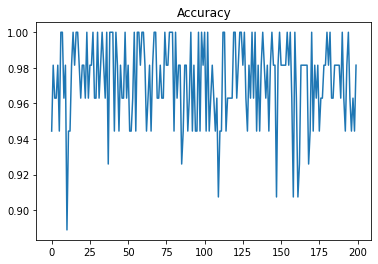

In [40]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt

#Create a Gaussian Classifier
gnb = GaussianNB()

acc = []

# Split dataset into training set and test set
# 70% training and 30% test
for i in range(0, 200):
  X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=i)
  #Train the model using the training sets
  gnb.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred = gnb.predict(X_test)
  
  # Model Accuracy, how often is the classifier correct?
  # y_test: real data
  # y_pred: prediction data
  print("Accuracy [ " ,i, " ] :", metrics.accuracy_score(y_test, y_pred))
  acc.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(acc)
plt.title("Accuracy")

## 3. 특징과 장단점

#### 장점 <br>
- 간단. 빠름. 정확.
- Computation cost 적음 -> 빠름.
- 큰 데이터셋에 적합.
- 연속형보다 이산형 데이터에서 성능 good.
- Multiple class 예측을 위해서도 사용 가능.


#### 단점 <br>
- feature 간의 독립성이 있어야 한다.
- 실제 데이터에서 모든 feature 가 독립인 경우는 드물다.


## Reference



- https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-1%EB%82%98%EC%9D%B4%EB%B8%8C-%EB%B2%A0%EC%9D%B4%EC%A6%88-%EB%B6%84%EB%A5%98-Naive-Bayes-Classification
- https://gomguard.tistory.com/69